Packt Computer Vision with Python3 - Digit Recognition

In [1]:
#import necessary modules here
#--the final notebook will have complete codes that can be
#--copied out into self-contained .py scripts

import numpy as np
import matplotlib.pyplot as plt
import cv2 
import sys
import tempfile

from sklearn import  svm, metrics
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

<class 'numpy.ndarray'>


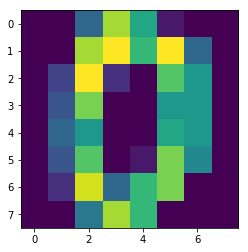

array([[ 0.],
       [ 0.],
       [ 5.],
       [13.],
       [ 9.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [13.],
       [15.],
       [10.],
       [15.],
       [ 5.],
       [ 0.],
       [ 0.],
       [ 3.],
       [15.],
       [ 2.],
       [ 0.],
       [11.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 4.],
       [12.],
       [ 0.],
       [ 0.],
       [ 8.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 5.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 9.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 4.],
       [11.],
       [ 0.],
       [ 1.],
       [12.],
       [ 7.],
       [ 0.],
       [ 0.],
       [ 2.],
       [14.],
       [ 5.],
       [10.],
       [12.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 6.],
       [13.],
       [10.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [2]:
#what kind of data do we already have?
from sklearn import datasets
digits=datasets.load_digits()

example_image=digits.images[0]
print(type(example_image))
plt.imshow(example_image); plt.show()
example_image.reshape((8*8,1))

In [3]:
#acquire standard MNIST handwritten digit data
#http://yann.lecun.com/exdb/mnist/

data_dir = '/tmp/tensorflow/mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


(55000, 784)


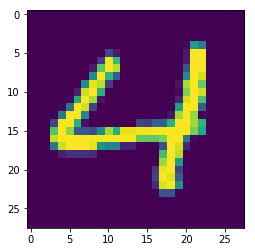

In [6]:
#now we load and examine the data
train_data=mnist.train.images
print(train_data.shape)
n_samples = train_data.shape[0]


train_labels=np.array(np.where(mnist.train.labels==1))[1]

plt.imshow(train_data[1256].reshape((28,28))); plt.show()

In [7]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
# Learn about gamma and other SVM parameters here:
# http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
# Exercise:  Experiment with the parameters to see how they affect execution 
#             time and accuracy

# Train the model -- we're only going to use the training data (and not
# the test data) to ensure that our model generalizes to unseen cases.
# This (training) is typically what takes the most computational time
# when doing machine learning.
classifier.fit(train_data, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# Now predict the value of the digit on the test data:
test_data=mnist.test.images
test_labels=np.array(np.where(mnist.test.labels==1))[1]

expected = test_labels
predicted = classifier.predict(test_data)

See https://en.wikipedia.org/wiki/Precision_and_recall to understand metric definitions
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.94      0.92      0.93      1032
           3       0.92      0.94      0.93      1010
           4       0.92      0.95      0.94       982
           5       0.93      0.90      0.91       892
           6       0.94      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.93      0.91      0.92       974
           9       0.94      0.91      0.92      1009

   micro avg       0.94      0.94      0.94     10000


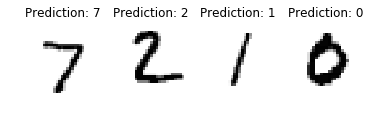

In [9]:
# And display the results
print("See https://en.wikipedia.org/wiki/Precision_and_recall to understand metric definitions")
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(test_data, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image.reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


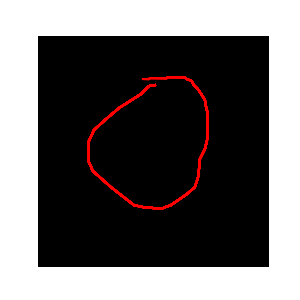

In [2]:
#Let's test our model on images we draw ourselves!

from matplotlib.lines import Line2D
%pylab notebook 
#This is needed for plot widgets

class Annotator(object):
    def __init__(self, axes):
        self.axes = axes

        self.xdata = []
        self.ydata = []
        self.xy    = []
        self.drawon = False

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        if self.drawon:
            self.xdata.append(x)
            self.ydata.append(y)
            self.xy.append((int(x),int(y)))
            line = Line2D(self.xdata,self.ydata)
            line.set_color('r')
            self.axes.add_line(line)

            plt.draw()

    def mouse_release(self, event):
        # Erase x and y data for new line
        self.xdata = []
        self.ydata = []
        self.drawon = False
        
    def mouse_press(self, event):
        self.drawon = True


img = np.zeros((28,28,3),dtype='uint8')

fig, axes = plt.subplots(figsize=(3,3))
axes.imshow(img)
plt.axis("off")
plt.gray()
annotator = Annotator(axes)
plt.connect('motion_notify_event', annotator.mouse_move)
plt.connect('button_release_event', annotator.mouse_release)
plt.connect('button_press_event', annotator.mouse_press)

axes.plot()

plt.show()

In [3]:
# Now we see how our model "sees" (predicts the digit from)
# our hand drawn image...
# First, we rasterize (convert to pixels) our vector data
# and process the image to more closely resemble something
# drawn with a pencil or pressure-sensitive tablet.

digimg = np.zeros((28,28,3),dtype='uint8')
for ind, points in enumerate(annotator.xy[:-1]):
    digimg=cv2.line(digimg, annotator.xy[ind], annotator.xy[ind+1],(255,0,0),1)
digimg = cv2.GaussianBlur(digimg,(5,5),1.0)
digimg = (digimg.astype('float') *1.0/np.amax(digimg)).astype('float')[:,:,0]
digimg **= 0.5; digimg[digimg>0.9]=1.0

#The model is expecting the input in a particular format
testim = digimg.reshape((-1,28*28))

print("Support vector machine prediction:",classifier.predict( testim ))

outimg = testim.reshape((28,28))
figure(figsize=(3,3)); imshow(outimg); 

NameError: name 'cv2' is not defined

<p>Tensorflow Softmax Digit Recognition</p>
More info here:
https://www.tensorflow.org/get_started/mnist/beginners   

In [18]:
# Import MNIST data (if not already done, or just in case)
data_dir = '/tmp/tensorflow/mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])


cross_entropy = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Model accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images,
                                  y_: mnist.test.labels}))



Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Model accuracy: 0.918


<IPython.core.display.Javascript object>


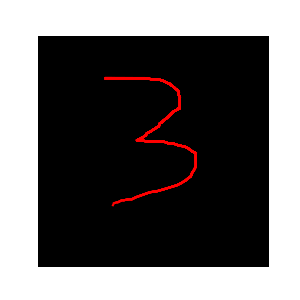

In [19]:
#test again on hand drawn images
img = np.zeros((28,28,3),dtype='uint8')
fig, axes = plt.subplots(figsize=(3,3))
axes.imshow(img)
plt.axis("off")
plt.gray()
annotator = Annotator(axes)
plt.connect('motion_notify_event', annotator.mouse_move)
plt.connect('button_release_event', annotator.mouse_release)
plt.connect('button_press_event', annotator.mouse_press)
axes.plot()
plt.show()

Predicted #: 3


<IPython.core.display.Javascript object>


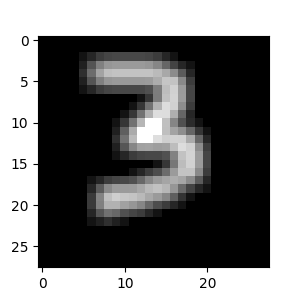

In [20]:
#Rasterize and preprocess
digimg = np.zeros((28,28,3),dtype='uint8')
for ind, points in enumerate(annotator.xy[:-1]):
    digimg=cv2.line(digimg, annotator.xy[ind], annotator.xy[ind+1],(255,0,0),1)
digimg = cv2.GaussianBlur(digimg,(5,5),1.0)
digimg = (digimg.astype('float') *1.0/np.amax(digimg)).astype('float')[:,:,0]
digimg **= 0.5; digimg[digimg>0.9]=1.0
testim = digimg.reshape((-1,28*28))

#and run through our trained Softmax model
for tindex in range(10):
    testlab = np.zeros((1,10))
    testlab[0,tindex] = 1
    if sess.run(accuracy, feed_dict={x: testim, y_ : testlab}) == 1:
        break
print("Predicted #:",tindex) #tindex = TF model prediction

#display the rasterized image
outimg = testim.reshape((28,28))
figure(figsize=(3,3)); imshow(outimg)

<p>Tensorflow Deep Learning/Convolutional Neural Network Digit recognition</p>
More info here: https://www.tensorflow.org/get_started/mnist/pros

In [21]:
def deepnn(x):
  """deepnn builds the graph for a deep net for classifying digits.
  Args:
    x: an input tensor with the dimensions (N_examples, 784), where 784 is the
    number of pixels in a standard MNIST image.
  Returns:
    A tuple (y, keep_prob). y is a tensor of shape (N_examples, 10), with values
    equal to the logits of classifying the digit into one of 10 classes (the
    digits 0-9). keep_prob is a scalar placeholder for the probability of
    dropout.
  """
  # Reshape to use within a convolutional neural net.
  # Last dimension is for "features" - there is only one here, since images are
  # grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
  with tf.name_scope('reshape'):
    x_image = tf.reshape(x, [-1, 28, 28, 1])

  # First convolutional layer - maps one grayscale image to 32 feature maps.
  with tf.name_scope('conv1'):
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

  # Pooling layer - downsamples by 2X.
  with tf.name_scope('pool1'):
    h_pool1 = max_pool_2x2(h_conv1)

  # Second convolutional layer -- maps 32 feature maps to 64.
  with tf.name_scope('conv2'):
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

  # Second pooling layer.
  with tf.name_scope('pool2'):
    h_pool2 = max_pool_2x2(h_conv2)

  # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
  # is down to 7x7x64 feature maps -- maps this to 1024 features.
  with tf.name_scope('fc1'):
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

  # Dropout - controls the complexity of the model, prevents co-adaptation of
  # features.
  with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

  # Map the 1024 features to 10 classes, one for each digit
  with tf.name_scope('fc2'):
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])

    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
  return y_conv, keep_prob


def conv2d(x, W):
  """conv2d returns a 2d convolution layer with full stride."""
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
  """max_pool_2x2 downsamples a feature map by 2X."""
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


def weight_variable(shape):
  """weight_variable generates a weight variable of a given shape."""
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)


def bias_variable(shape):
  """bias_variable generates a bias variable of a given shape."""
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

###begin main code

data_dir= '/tmp/tensorflow/mnist/input_data'
# Import data
mnist = input_data.read_data_sets(data_dir, one_hot=True)

# Create the model
x = tf.placeholder(tf.float32, [None, 784])

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

# Build the graph for the deep net
y_conv, keep_prob = deepnn(x)

with tf.name_scope('loss'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_,
                                                        logits=y_conv)
cross_entropy = tf.reduce_mean(cross_entropy)

with tf.name_scope('adam_optimizer'):
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    correct_prediction = tf.cast(correct_prediction, tf.float32)
    accuracy = tf.reduce_mean(correct_prediction)

graph_location = tempfile.mkdtemp()
print('Saving graph to: %s' % graph_location)
train_writer = tf.summary.FileWriter(graph_location)
train_writer.add_graph(tf.get_default_graph())

# Let's run the model
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i % 100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x: batch[0], y_: batch[1], keep_prob: 1.0})
    print('step %d, training accuracy %g' % (i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

# How did we do?
print('test accuracy %g' % accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Saving graph to: /tmp/tmpdr9rhjcj
step 0, training accuracy 0.1
step 100, training accuracy 0.86
step 200, training accuracy 0.92
step 300, training accuracy 0.94
step 400, training accuracy 0.94
step 500, training accuracy 0.92
step 600, training accuracy 0.9
step 700, training accuracy 0.88
step 800, training accuracy 0.92
step 900, training accuracy 0.96
step 1000, training accuracy 0.92
step 1100, training accuracy 0.98
step 1200, training accuracy 0.98
step 1300, training accuracy 0.98
step 1400, training accuracy 0.86
step 1500, training accuracy 0.96
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 0.98
step 1900, training accuracy 0.98
step 2000, training a

In [1]:
# Test on handwritten digits again
img = np.zeros((28,28,3),dtype='uint8')
fig, axes = plt.subplots(figsize=(3,3))
axes.imshow(img)
plt.axis("off")
plt.gray()
annotator = Annotator(axes)
plt.connect('motion_notify_event', annotator.mouse_move)
plt.connect('button_release_event', annotator.mouse_release)
plt.connect('button_press_event', annotator.mouse_press)
axes.plot()
plt.show()

NameError: name 'np' is not defined

Predicted #: 9


<IPython.core.display.Javascript object>


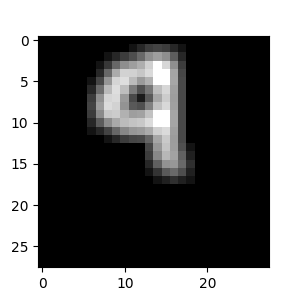

In [49]:
# Rasterize and preprocess the above
digimg = np.zeros((28,28,3),dtype='uint8')
for ind, points in enumerate(annotator.xy[:-1]):
    digimg=cv2.line(digimg, annotator.xy[ind], annotator.xy[ind+1],(255,0,0),1)
digimg = cv2.GaussianBlur(digimg,(5,5),1.0)
digimg = (digimg.astype('float') *1.0/np.amax(digimg)).astype('float')[:,:,0]
digimg **= 0.5; digimg[digimg>0.9]=1.0
testim = digimg.reshape((-1,28*28))

# And run through our model
for tindex in range(10):
    testlab = np.zeros((1,10))
    testlab[0,tindex] = 1
    if accuracy.eval(feed_dict={x: testim, y_: testlab, 
                                keep_prob: 1.0}) == 1:
        break

print("Predicted #:",tindex) #tindex = TF model prediction

# Display our rasterized digit
outimg = testim.reshape((28,28))
figure(figsize=(3,3)); imshow(outimg)